* MSV_HoVaTen:
521H0501_Phan Minh Hoàng,
521H0398_Lê Nguyễn Viết Hiệp,
521H0276_Trang Sĩ Nam



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('bike_buyers.csv')
print(data.shape)
data.head(6)

(1000, 13)


,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes
5,13507,Married,Female,10000.0,2.0,Partial College,Manual,Yes,0.0,1-2 Miles,Europe,50.0,No


In [4]:
data.isna().sum()

ID                   0
Marital Status       7
Gender              11
Income               6
Children             8
Education            0
Occupation           0
Home Owner           4
Cars                 9
Commute Distance     0
Region               0
Age                  8
Purchased Bike       0
dtype: int64

In [5]:
data.describe()

,ID,Income,Children,Cars,Age
count,1000.000000,994.000000,992.000000,991.000000,992.000000
mean,19965.992000,56267.605634,1.910282,1.455096,44.181452
std,5347.333948,31067.817462,1.626910,1.121755,11.362007
min,11000.000000,10000.000000,0.000000,0.000000,25.000000
25%,15290.750000,30000.000000,0.000000,1.000000,35.000000
50%,19744.000000,60000.000000,2.000000,1.000000,43.000000
75%,24470.750000,70000.000000,3.000000,2.000000,52.000000
max,29447.000000,170000.000000,5.000000,4.000000,89.000000


* Histogram of features

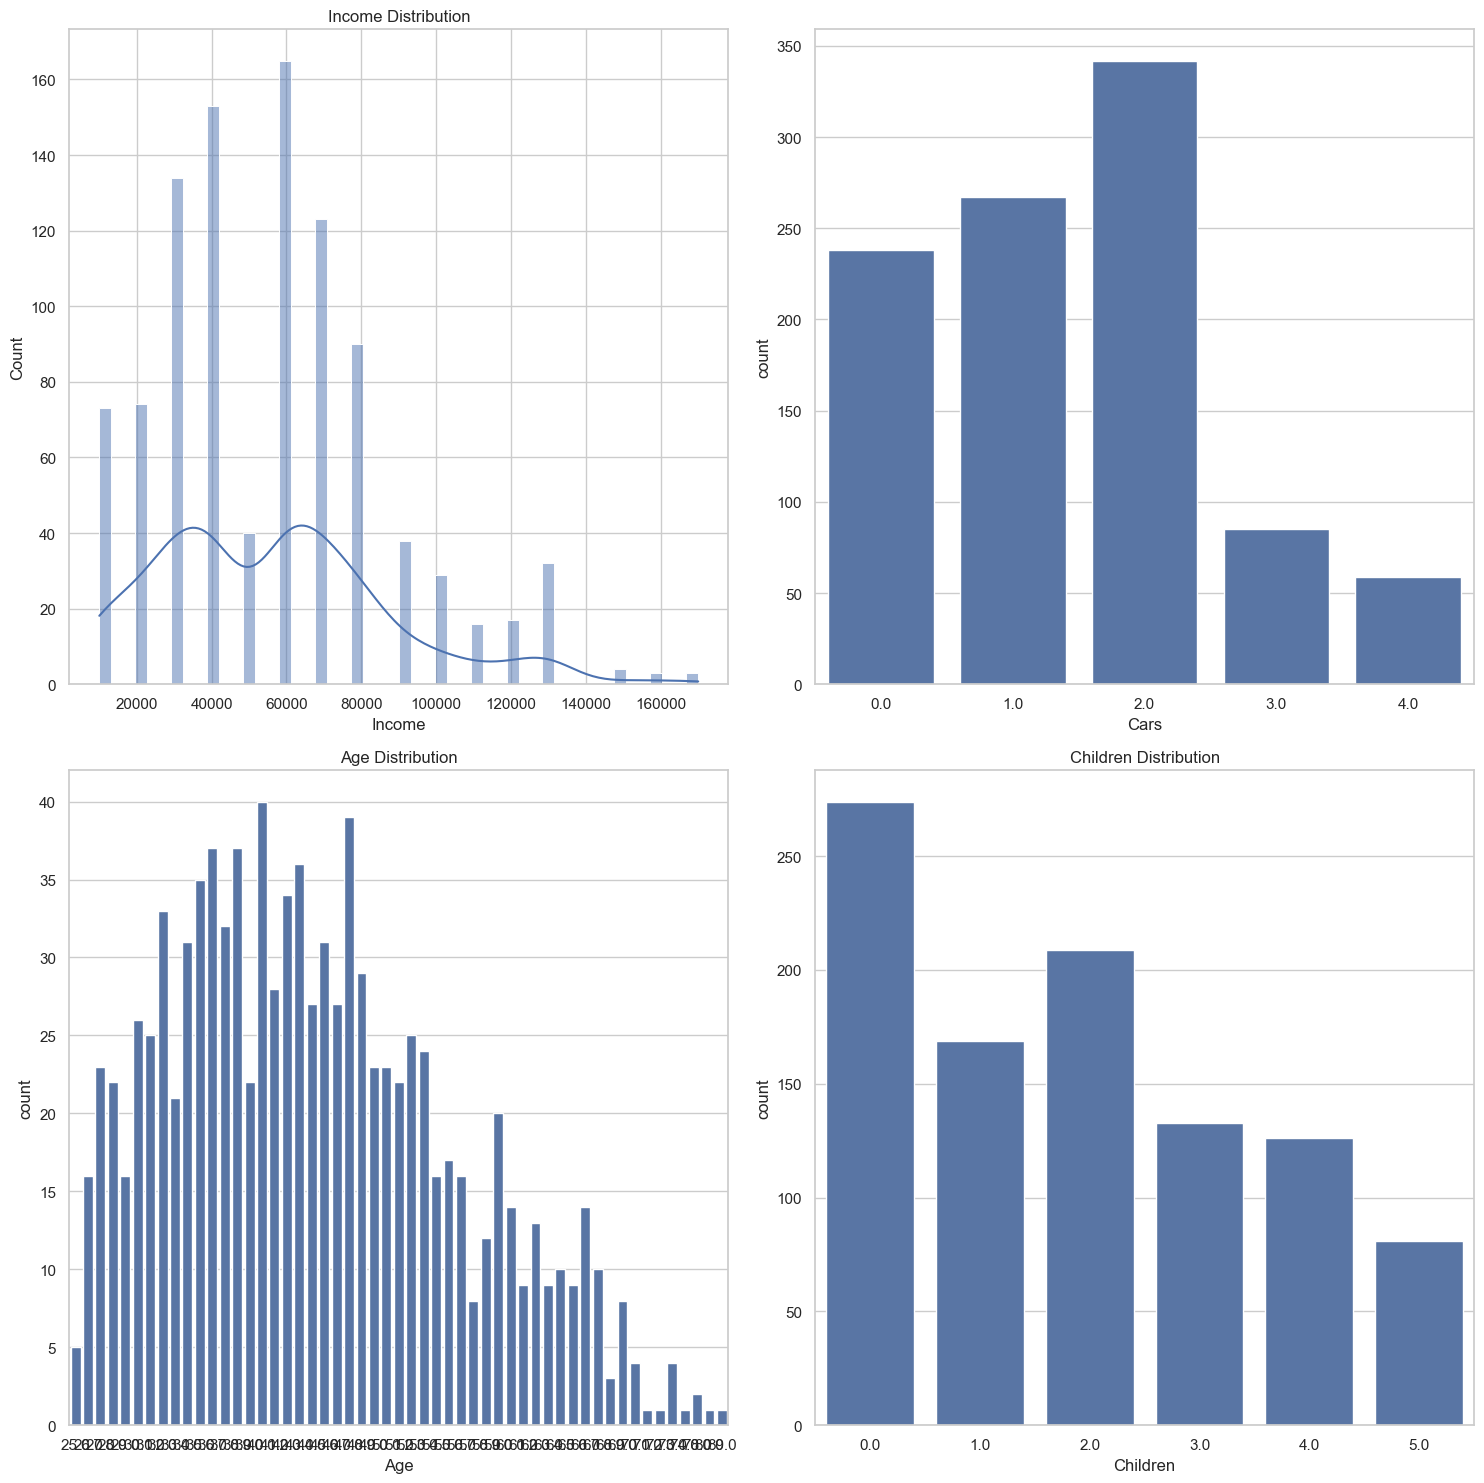

In [6]:
sns.set(style='whitegrid')

fig, axs = plt.subplots(2, 2, figsize=(15, 15))

# Price distribution
sns.histplot(data['Income'], bins=50, ax=axs[0, 0], kde=True)
axs[0, 0].set_title('Income Distribution')

# Children Distribution
sns.countplot(x='Cars', data=data, ax=axs[0, 1])
axs[1, 1].set_title('Children Distribution')

# Age Distribution
sns.countplot(x='Age', data=data, ax=axs[1, 0])
axs[1, 0].set_title('Age Distribution')

# Children Distribution
sns.countplot(x='Children', data=data, ax=axs[1, 1])
axs[1, 1].set_title('Children Distribution')

plt.tight_layout()

* the distribution between INCOME and OCCUPATION

Text(0.5, 0, 'Income in Pacific')

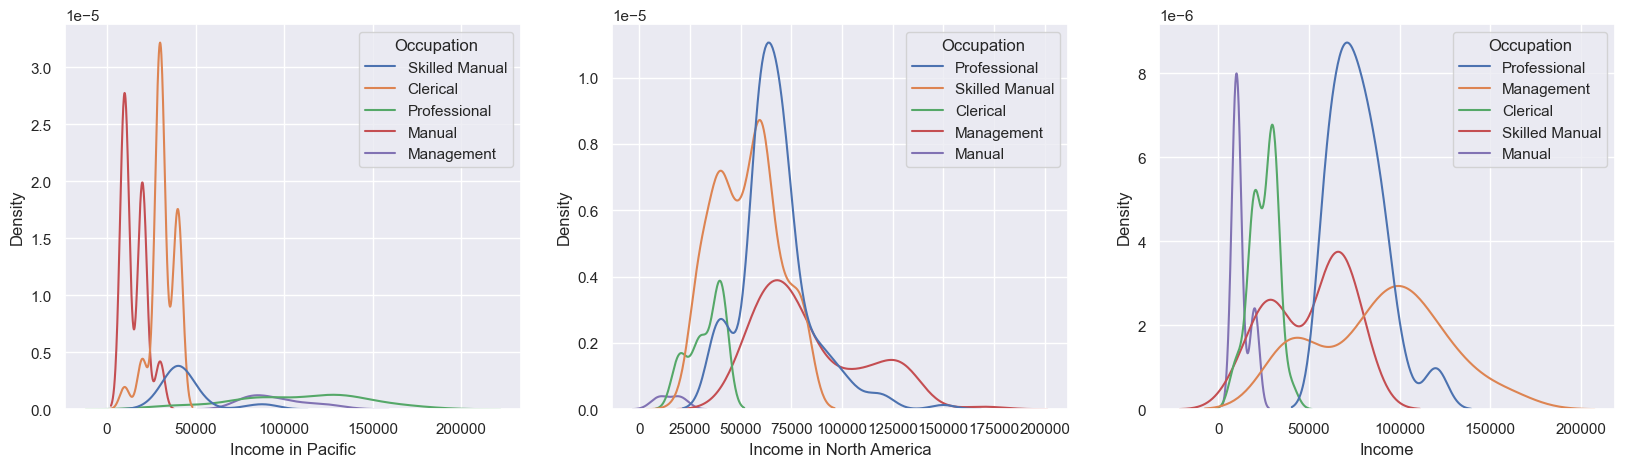

In [7]:
sns.set(rc={'figure.figsize':(20,5)})
fig, axes = plt.subplots(1,3)

sns.kdeplot(data = data[data['Region'] == 'Europe'] , x ='Income', hue = 'Occupation', ax = axes[0])
axes[0].set_xlabel('Income in Europe')
sns.kdeplot(data = data[data['Region'] == 'North America'] , x ='Income', hue = 'Occupation', ax = axes[1])
axes[1].set_xlabel('Income in North America')
sns.kdeplot(data = data[data['Region'] == 'Pacific'] , x ='Income', hue = 'Occupation', ax = axes[2])
axes[0].set_xlabel('Income in Pacific')

C:\Users\Administrator\AppData\Local\Temp\ipykernel_16112\1869319099.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edu_data['proportional_count'] = np.round(edu_data['count'] / edu_data['count'].sum(), 2)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_16112\1869319099.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edu_data['proportional_count'] = np.round(edu_data['count'] / edu_data['count'].sum(), 2)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_16112\1869319099.py:7: SettingWithCopy

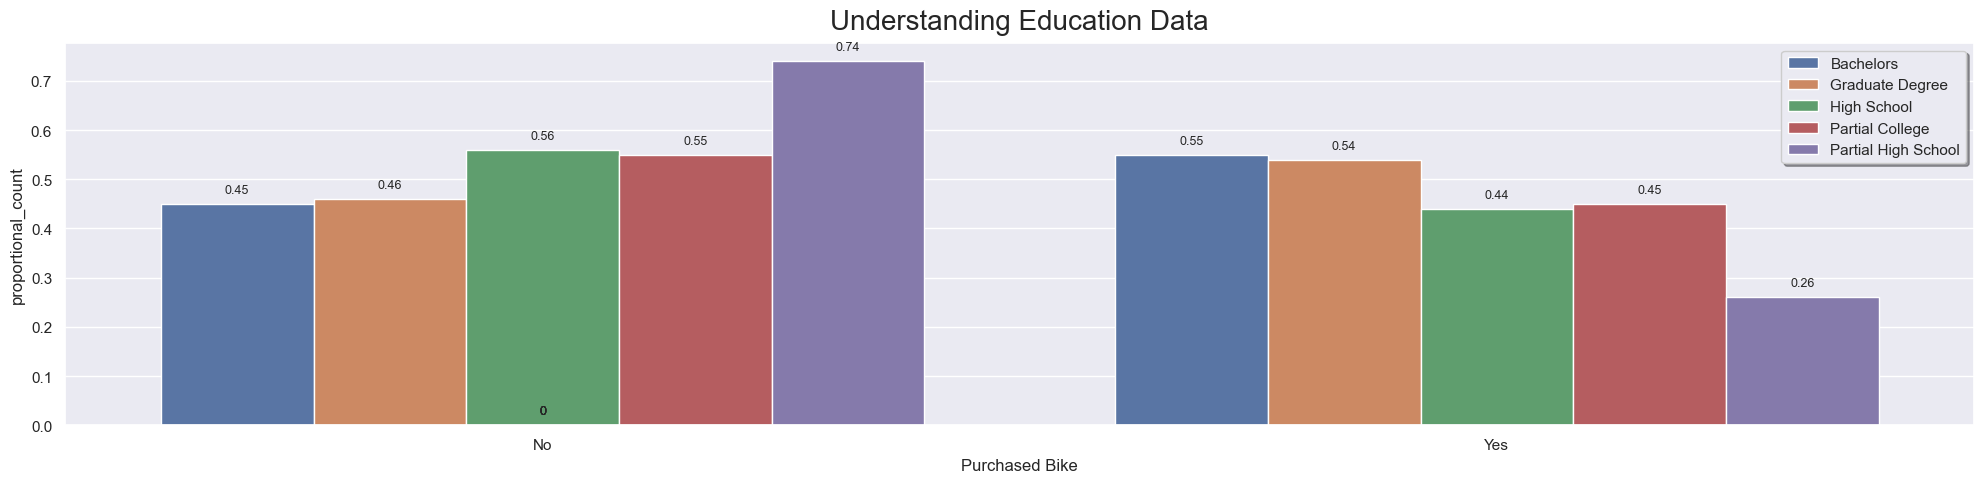

In [23]:
edu_counts = data['Education'].value_counts().reset_index()
grouped_data = data.groupby(['Education','Purchased Bike']).size().reset_index().rename(columns={0:'count'})

proportional_data = []
for edu in grouped_data['Education'].unique():
    edu_data = grouped_data[grouped_data['Education'] == edu]
    edu_data['proportional_count'] = np.round(edu_data['count'] / edu_data['count'].sum(), 2)
    proportional_data.append(edu_data)
grouped_data = pd.concat(proportional_data)

# Create subplot
plt.title('Understanding Education Data', fontsize=20, pad=10)

bar_plot = sns.barplot(data=grouped_data, x='Purchased Bike', y='proportional_count', hue='Education')
for bar in bar_plot.patches:
    bar_plot.annotate(f'{bar.get_height()}', (bar.get_x() + bar.get_width() / 2., bar.get_height()),
                      ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=9)

plt.legend(shadow=True)
plt.tight_layout()
plt.show()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_16112\2735303557.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edu_data['proportional_count'] = np.round(edu_data['count'] / edu_data['count'].sum(), 2)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_16112\2735303557.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edu_data['proportional_count'] = np.round(edu_data['count'] / edu_data['count'].sum(), 2)


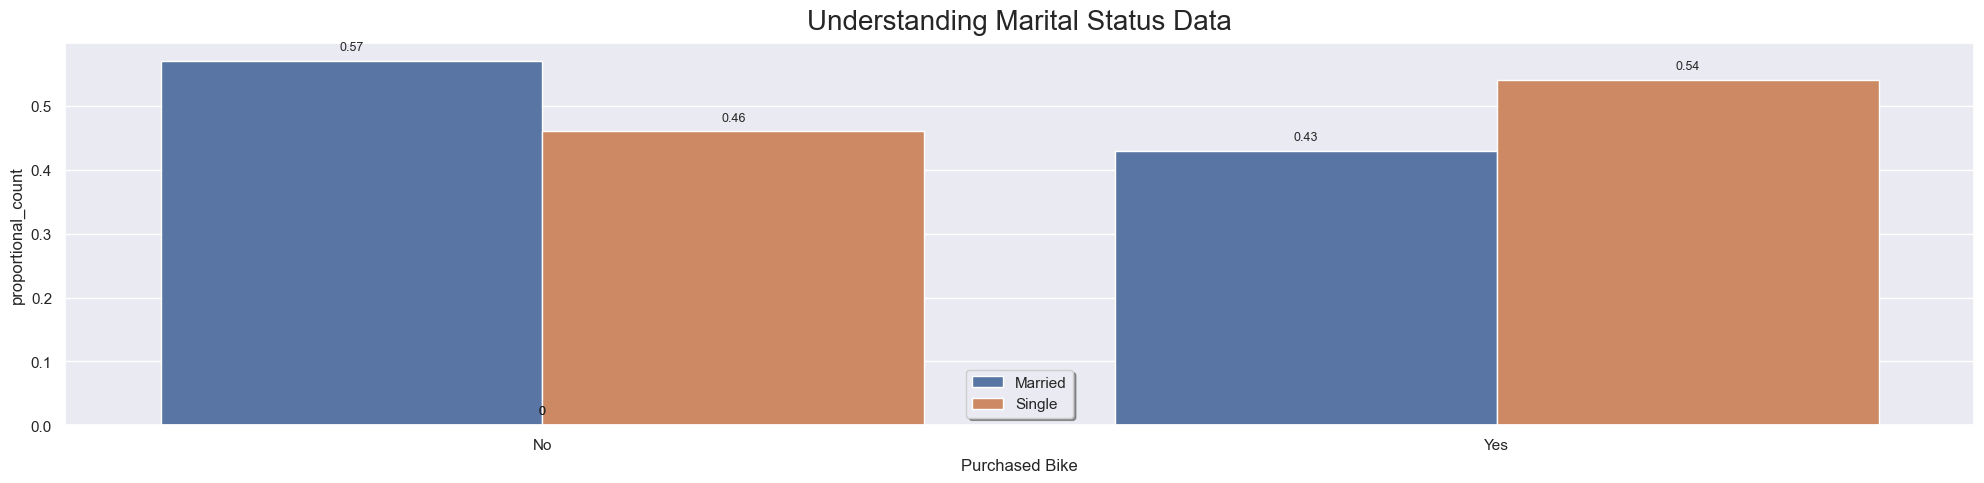

In [31]:
edu_counts = data['Marital Status'].value_counts().reset_index()
grouped_data = data.groupby(['Marital Status','Purchased Bike']).size().reset_index().rename(columns={0:'count'})

proportional_data = []
for edu in grouped_data['Marital Status'].unique():
    edu_data = grouped_data[grouped_data['Marital Status'] == edu]
    edu_data['proportional_count'] = np.round(edu_data['count'] / edu_data['count'].sum(), 2)
    proportional_data.append(edu_data)
grouped_data = pd.concat(proportional_data)

# Create subplot
plt.title('Understanding Marital Status Data', fontsize=20, pad=10)

bar_plot = sns.barplot(data=grouped_data, x='Purchased Bike', y='proportional_count', hue='Marital Status')
for bar in bar_plot.patches:
    bar_plot.annotate(f'{bar.get_height()}', (bar.get_x() + bar.get_width() / 2., bar.get_height()),
                      ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=9)

plt.legend(shadow=True)
plt.tight_layout()
plt.show()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_16112\3750304100.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edu_data['proportional_count'] = np.round(edu_data['count'] / edu_data['count'].sum(), 2)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_16112\3750304100.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edu_data['proportional_count'] = np.round(edu_data['count'] / edu_data['count'].sum(), 2)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_16112\3750304100.py:7: SettingWithCopy

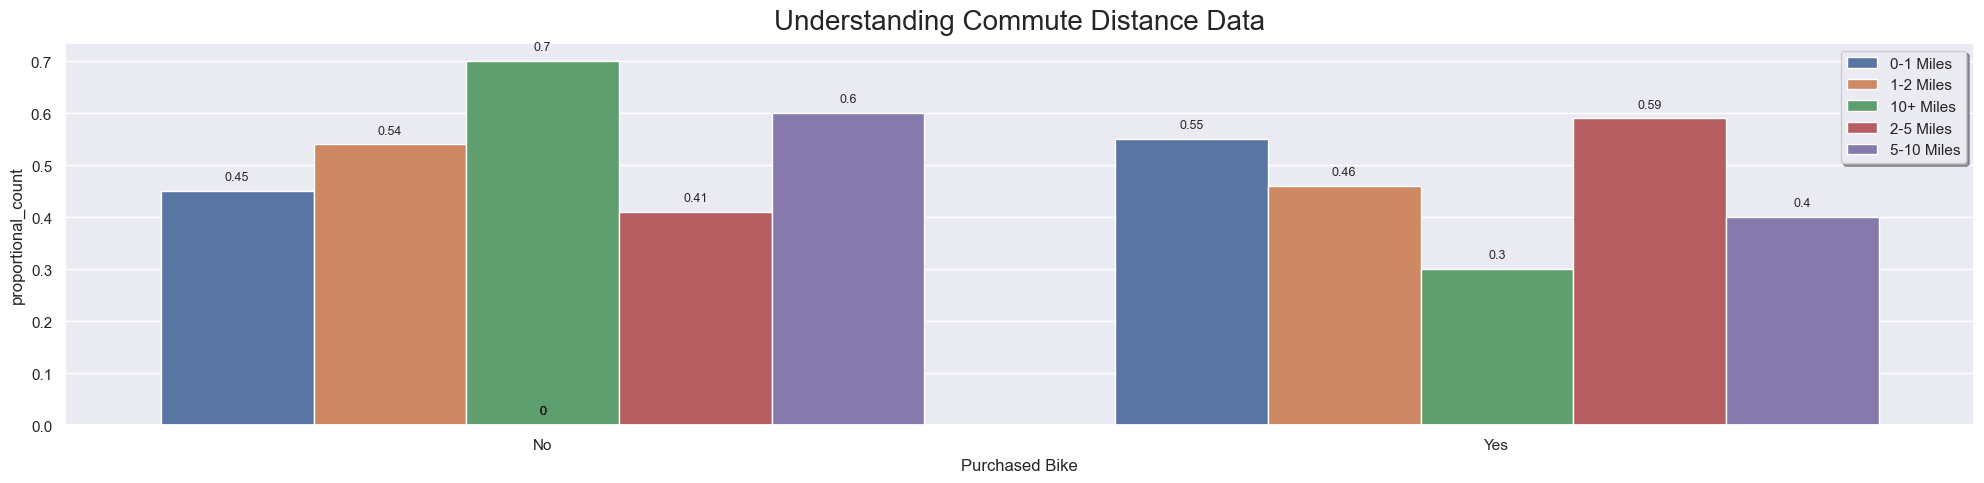

In [25]:
edu_counts = data['Commute Distance'].value_counts().reset_index()
grouped_data = data.groupby(['Commute Distance','Purchased Bike']).size().reset_index().rename(columns={0:'count'})

proportional_data = []
for edu in grouped_data['Commute Distance'].unique():
    edu_data = grouped_data[grouped_data['Commute Distance'] == edu]
    edu_data['proportional_count'] = np.round(edu_data['count'] / edu_data['count'].sum(), 2)
    proportional_data.append(edu_data)
grouped_data = pd.concat(proportional_data)

# Create subplot
plt.title('Understanding Commute Distance Data', fontsize=20, pad=10)

bar_plot = sns.barplot(data=grouped_data, x='Purchased Bike', y='proportional_count', hue='Commute Distance')
for bar in bar_plot.patches:
    bar_plot.annotate(f'{bar.get_height()}', (bar.get_x() + bar.get_width() / 2., bar.get_height()),
                      ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=9)

plt.legend(shadow=True)
plt.tight_layout()
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_16112\1268292795.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edu_data['proportional_count'] = np.round(edu_data['count'] / edu_data['count'].sum(), 2)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_16112\1268292795.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edu_data['proportional_count'] = np.round(edu_data['count'] / edu_data['count'].sum(), 2)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_16112\1268292795.py:7: SettingWithCopy

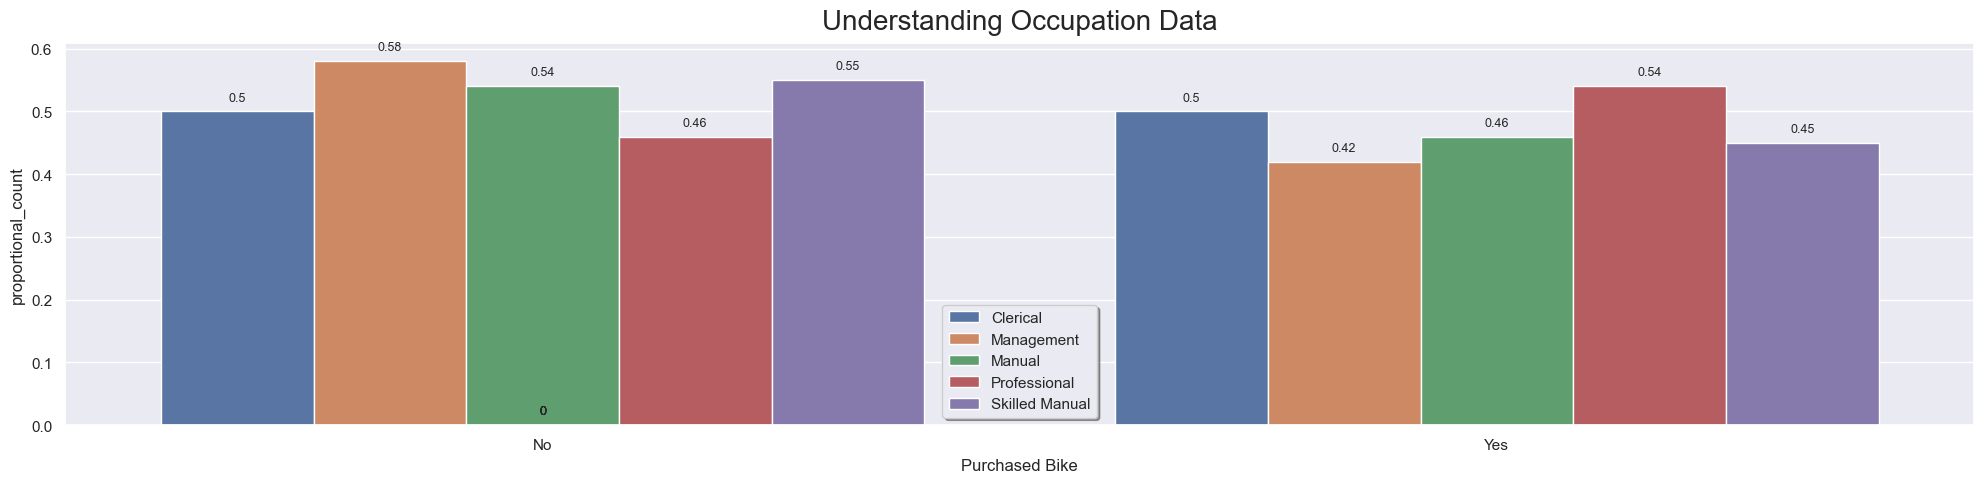

In [32]:
edu_counts = data['Occupation'].value_counts().reset_index()
grouped_data = data.groupby(['Occupation','Purchased Bike']).size().reset_index().rename(columns={0:'count'})

proportional_data = []
for edu in grouped_data['Occupation'].unique():
    edu_data = grouped_data[grouped_data['Occupation'] == edu]
    edu_data['proportional_count'] = np.round(edu_data['count'] / edu_data['count'].sum(), 2)
    proportional_data.append(edu_data)
grouped_data = pd.concat(proportional_data)

# Create subplot
plt.title('Understanding Occupation Data', fontsize=20, pad=10)

bar_plot = sns.barplot(data=grouped_data, x='Purchased Bike', y='proportional_count', hue='Occupation')
for bar in bar_plot.patches:
    bar_plot.annotate(f'{bar.get_height()}', (bar.get_x() + bar.get_width() / 2., bar.get_height()),
                      ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=9)

plt.legend(shadow=True)
plt.tight_layout()
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1000 non-null   int64  
 1   Marital Status    993 non-null    object 
 2   Gender            989 non-null    object 
 3   Income            994 non-null    float64
 4   Children          992 non-null    float64
 5   Education         1000 non-null   object 
 6   Occupation        1000 non-null   object 
 7   Home Owner        996 non-null    object 
 8   Cars              991 non-null    float64
 9   Commute Distance  1000 non-null   object 
 10  Region            1000 non-null   object 
 11  Age               992 non-null    float64
 12  Purchased Bike    1000 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 101.7+ KB


In [ ]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 952 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                952 non-null    int64  
 1   Marital Status    952 non-null    object 
 2   Gender            952 non-null    object 
 3   Income            952 non-null    float64
 4   Children          952 non-null    float64
 5   Education         952 non-null    object 
 6   Occupation        952 non-null    object 
 7   Home Owner        952 non-null    object 
 8   Cars              952 non-null    float64
 9   Commute Distance  952 non-null    object 
 10  Region            952 non-null    object 
 11  Age               952 non-null    float64
 12  Purchased Bike    952 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 104.1+ KB


In [ ]:
# Check duplicate
data.duplicated().value_counts()

False    952
dtype: int64

In [ ]:
data = data.drop_duplicates()
data.shape

(952, 13)

# Transformation

In [ ]:
# Tranform data
from sklearn.preprocessing import LabelEncoder

types = data.dtypes
names = list(data.columns)

le = LabelEncoder()
for i in range(len(types)):
    if types.iloc[i]=='object':
        le.fit_transform(data[names[i]])
        data[names[i]] = le.transform(data[names[i]])

print(data.head())

      ID  Marital Status  Gender   Income  Children  Education  Occupation  \
0  12496               0       0  40000.0       1.0          0           4   
1  24107               0       1  30000.0       3.0          3           0   
2  14177               0       1  80000.0       5.0          3           3   
4  25597               1       1  30000.0       0.0          0           0   
5  13507               0       0  10000.0       2.0          3           2   

   Home Owner  Cars  Commute Distance  Region   Age  Purchased Bike  
0           1   0.0                 0       0  42.0               0  
1           1   1.0                 0       0  43.0               0  
2           0   2.0                 3       0  60.0               0  
4           0   0.0                 0       0  36.0               1  
5           1   0.0                 1       0  50.0               0  


# Normalization


In [ ]:
from sklearn.preprocessing import MinMaxScaler
features = data.drop(['Purchased Bike'], axis=1)

scaler = MinMaxScaler()
model=scaler.fit(features)
scaled_data= pd.DataFrame(model.transform(features))

# Evaluate Feature

<Axes: >

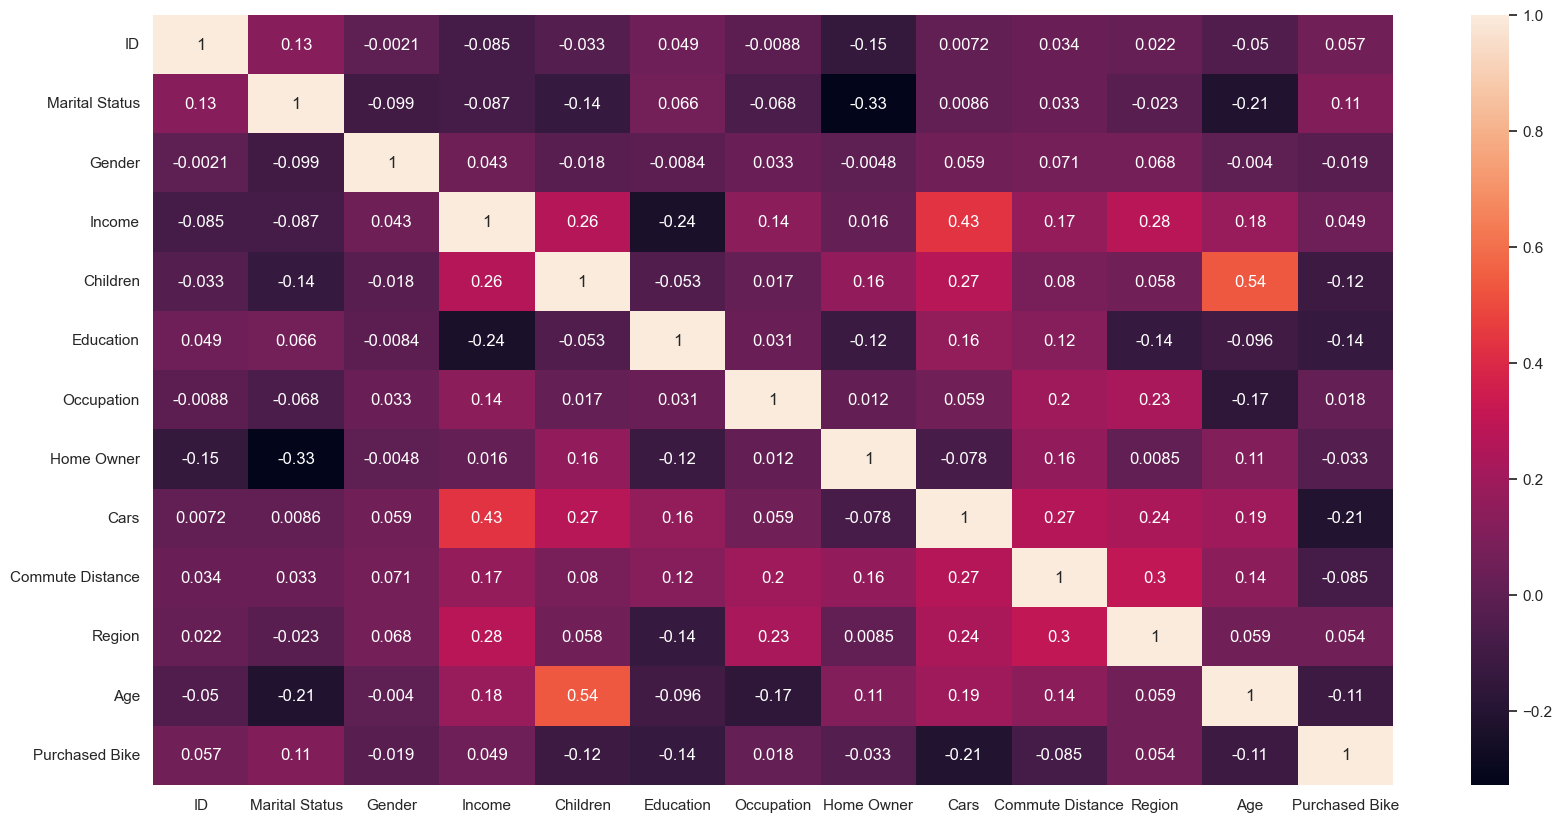

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(), annot=True)

In [ ]:
# split data
X = scaled_data
y = data['Purchased Bike']

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
select_feature =  SelectKBest(score_func=chi2, k = 8)
f_best = select_feature.fit(X, y)               
X_new = f_best.transform(X)
X_new.shape

(952, 8)

In [ ]:
data_score = pd.DataFrame(select_feature.scores_)
data_columns = pd.DataFrame(features.columns)

feature_score = pd.concat([data_columns, data_score], axis = 1)
feature_score.columns = ['Features', 'Score']
feature_score

,Features,Score
0,ID,0.526302
1,Marital Status,5.824995
2,Gender,0.164689
3,Income,0.295499
4,Children,3.635459
5,Education,4.980996
6,Occupation,0.074135
7,Home Owner,0.327737
8,Cars,8.518582
9,Commute Distance,2.524616


In [ ]:
kept_features = pd.DataFrame({'columns': data.columns[:-1],
                              'Kept': select_feature.get_support()})
kept_features

,columns,Kept
0,ID,True
1,Marital Status,True
2,Gender,False
3,Income,False
4,Children,True
5,Education,True
6,Occupation,False
7,Home Owner,False
8,Cars,True
9,Commute Distance,True
